# AAPL、GOOG、MSFT、AMZN、FB股票市场分析

**目的：**
- 分析每个公司的股价走势
- 比较亚马逊和谷歌以及微软和脸书的股价走势
- 通过分位数来对苹果的股价进行风险评估
- 彩蛋：分析唯品会的股价趋势

In [122]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
# 利用此包获取数据
import pandas_datareader as pdr
import seaborn as sns

In [123]:
# 取股价数据的开始时间
start = datetime(2015, 1, 1)
company = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB']
# 从yahoo获取数据(需要科学上网)
# top_tech_df = pdr.get_data_yahoo(company, start=start)['Adj Close']

In [124]:
# 将数据写到本地data文件夹中
# top_tech_df.to_csv('../data/compy_top5.csv')

In [125]:
# 从本地读取航班数据
top_tech_df = pd.read_csv("./data/compy_top5.csv", index_col=0, header=0)

In [126]:
top_tech_df.head()

,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2014-12-31,101.419060,524.958740,41.700874,310.350006,78.019997
2015-01-02,100.454300,523.373108,41.979183,308.519989,78.449997
2015-01-05,97.624336,512.463013,41.593143,302.190002,77.190002
2015-01-06,97.633545,500.585632,40.982681,295.290009,76.150002
2015-01-07,99.002556,499.727997,41.503380,298.420013,76.150002


In [127]:
# 获取当日数据的股价差（当日最高点的股价减去当日最低点的股价）
top_tech_dr = top_tech_df.pct_change()

In [128]:
top_tech_dr

,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.009513,-0.003020,0.006674,-0.005897,0.005511
2015-01-05,-0.028172,-0.020846,-0.009196,-0.020517,-0.016061
2015-01-06,0.000094,-0.023177,-0.014677,-0.022833,-0.013473
2015-01-07,0.014022,-0.001713,0.012705,0.010600,0.000000
...,...,...,...,...,...
2019-12-20,-0.002071,-0.004757,0.010918,-0.003225,0.001165
2019-12-23,0.016318,-0.000556,0.000000,0.003638,-0.000582
2019-12-24,0.000951,-0.003914,-0.000191,-0.002114,-0.005141


### 1.分析每个公司的股价走势

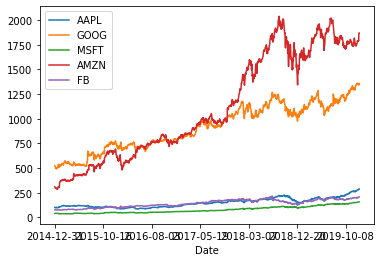

In [129]:
# 画出每个公司的价格走势图
top_tech_df.plot()
plt.show()

**由上图可以清晰的看出15年到19年这几个公司的股价都呈上升趋势，但AMZN、GOOG的股价上升的更为明显，这其中可能也与其公司规模有关。**

### 2.比较AAPl、FB、MSFT三家公司的股价

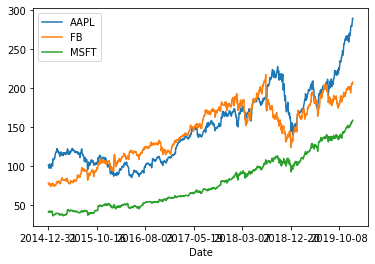

In [130]:
top_tech_df[['AAPL', 'FB', 'MSFT']].plot()
plt.show()

**由上图可以看出，当将这三家规模差不多的公司放在一起进行比较时，可以发现AAPL和FB股价走势非常接近，可以推测这两家公司是否存在相互影响的关系。而MSFT股价的走势非常平稳，呈稳步上升趋势。**

### 3.使用散点图比较亚马逊和谷歌的股价走势

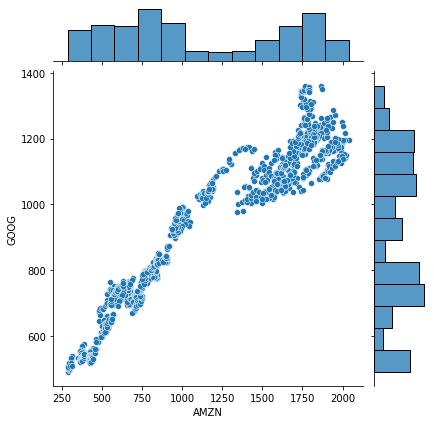

In [131]:
sns.jointplot(x='AMZN', y='GOOG', data=top_tech_df, kind='scatter')
plt.show()

**由上图可以看出AMZN和GOOG之间的相关性还是挺强的，基本呈一条直线，说明他们之间还是存在相互影响的关系的。**

### 4.使用散点图比较微软和脸书的股价走势

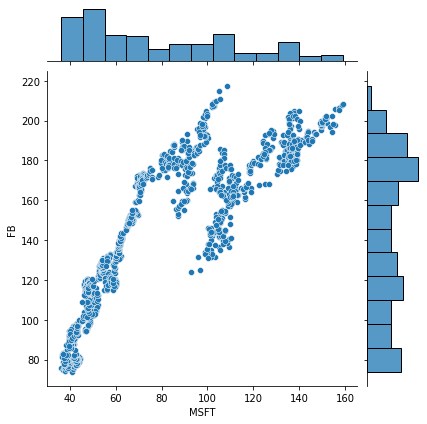

In [132]:
sns.jointplot(x='MSFT', y='FB', data=top_tech_df, kind='scatter')
plt.show()

**由上图可以看出，这两家公司的散点图比较分散，可以初步判断这两家公司在业务上可能并没有很强的关联性。**

### 5.多图比较

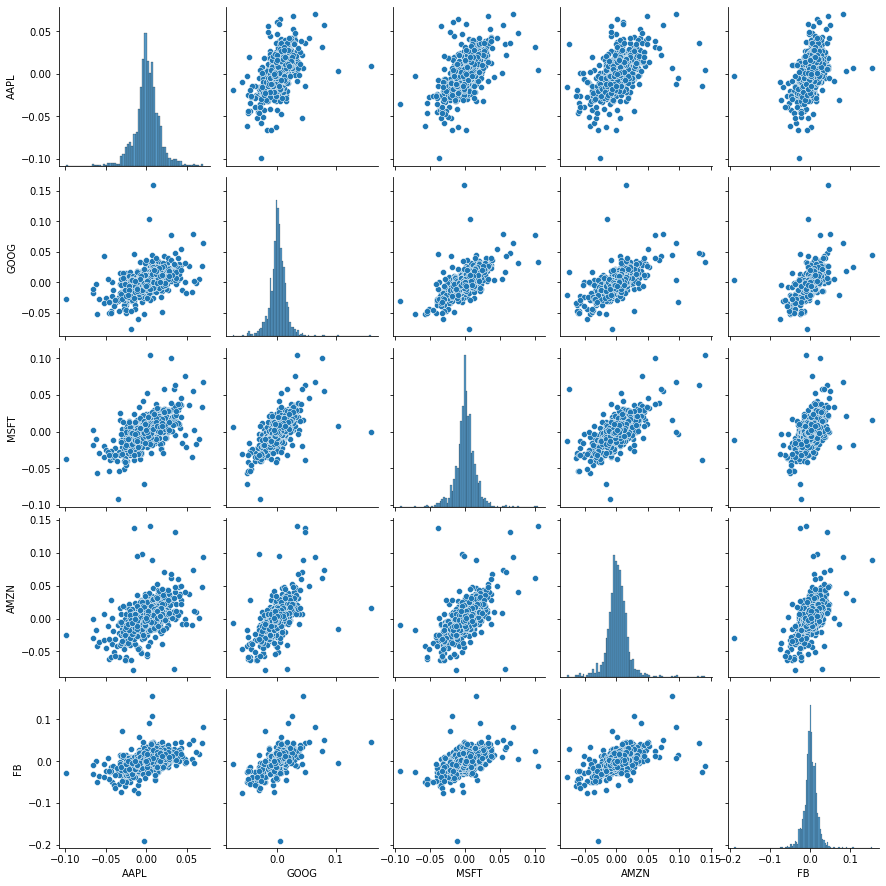

In [133]:
sns.pairplot(top_tech_dr.dropna())
plt.show()

**从中可以详细的比较出各个公司之间的关联关系。（此处的分析我就省略了，大家自由发挥。）**

### 6.通过分位数来评估AAPL风险

In [134]:
top_tech_dr['AAPL'].quantile(0.25)

-0.005864575038559555

**含义是：我们有75%的信心确保最大亏损是-0.005**

### 7.评估MSFT的风险

In [135]:
top_tech_dr['MSFT'].quantile(0.05)

-0.021079002470549335

**含义是：我们有95%的信心确保MSFT的股价最大亏损是-0.02**

### 8.分析唯品会的股票趋势

In [140]:
vips = pdr.get_data_yahoo('VIPS', start=start)['Adj Close']
vips.plot()
plt.show()

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/VIPS/history?period1=1420056000&period2=1668110399&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n<html lang="zh">\n<head>\n    <meta charset="utf-8">\n    <title>Yahoo</title>\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <style>\nhtml {\n  height: 100%;\n}\nbody {\n  background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n  background-size: cover;\n  height: 100%;\n  text-align: center;\n  font: 300 16px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n}\n#message {\n  text-align: left;\n  font-weight: 400;\n  color: #1A1A1A;\n}\n#message a {\n  padding: 0 3px;\n}\n#container {\n  position: absolute;\n  top: 50%;\n  left: 50%;\n  padding: 0 30px;\n  margin-right: -50%;\n  transform: translate(-50%, -50%);\n  max-width: 40em;\n  _width: 40em;\n}\n#container img {\n  width: 174px;\n  height: auto;\n}\n#switcher a {\n  font-weight: 400;\n}\n#switcher a.active {\n  color: #000;\n  text-decoration: none;\n  cursor: default;\n}\n    </style>\n</head>\n<body>\n  <div id="container">\n    <img src="https://s.yimg.com/rz/p/yahoo_homepage_en-US_s_f_p_bestfit_homepage_2x.png" alt="Yahoo Logo">\n    <div id="switcher">\n      <a data-lang="en" class="active" href=\'#\'>English</a> |\n      <a data-lang="zh-Hant" href=\'#\'>\xe7\xb9\x81\xe9\xab\x94\xe4\xb8\xad\xe6\x96\x87</a> |\n      <a data-lang="zh-Hans" href=\'#\'>\xe7\xae\x80\xe4\xbd\x93\xe4\xb8\xad\xe6\x96\x87</a>\n    </div>\n    <div id="message">\n      <p>As of November 1st, 2021 Yahoo\xe2\x80\x99s suite of services will no longer be accessible from mainland China. Yahoo products and services remain unaffected in all other global locations. We thank you for your support and readership.</p>\n    </div>\n  </div>\n<script>\nconst Msg = {\n  \'en\': \'<p>As of November 1st, 2021 Yahoo\xe2\x80\x99s suite of services will no longer be accessible from mainland China. Yahoo products and services remain unaffected in all other global locations. We thank you for your support and readership.</p>\',\n  \'zh-Hant\': \'<p>2021 \xe5\xb9\xb4 11 \xe6\x9c\x88 1 \xe6\x97\xa5\xe8\xb5\xb7\xef\xbc\x8c\xe7\x94\xa8\xe6\x88\xb6\xe5\xb0\x87\xe7\x84\xa1\xe6\xb3\x95\xe5\xbe\x9e\xe4\xb8\xad\xe5\x9c\x8b\xe5\xa4\xa7\xe9\x99\xb8\xe4\xbd\xbf\xe7\x94\xa8 Yahoo \xe7\x9a\x84\xe7\x94\xa2\xe5\x93\x81\xe8\x88\x87\xe6\x9c\x8d\xe5\x8b\x99\xe3\x80\x82\xe9\x80\x99\xe4\xb8\xa6\xe4\xb8\x8d\xe5\xbd\xb1\xe9\x9f\xbf Yahoo \xe5\x9c\xa8\xe5\x85\xa8\xe7\x90\x83\xe5\x85\xb6\xe4\xbb\x96\xe5\x9c\xb0\xe6\x96\xb9\xe7\x9a\x84\xe7\x94\xa2\xe5\x93\x81\xe5\x8f\x8a\xe6\x9c\x8d\xe5\x8b\x99\xe3\x80\x82\xe6\x88\x91\xe5\x80\x91\xe6\x84\x9f\xe8\xac\x9d\xe6\x82\xa8\xe4\xb8\x80\xe7\x9b\xb4\xe4\xbb\xa5\xe4\xbe\x86\xe7\x9a\x84\xe6\x94\xaf\xe6\x8c\x81\xe3\x80\x82</p>\',\n  \'zh-Hans\': \'<p>2021 \xe5\xb9\xb4 11 \xe6\x9c\x88 1 \xe6\x97\xa5\xe8\xb5\xb7\xef\xbc\x8c\xe7\x94\xa8\xe6\x88\xb7\xe5\xb0\x86\xe6\x97\xa0\xe6\xb3\x95\xe4\xbb\x8e\xe4\xb8\xad\xe5\x9b\xbd\xe5\xa4\xa7\xe9\x99\x86\xe4\xbd\xbf\xe7\x94\xa8 Yahoo \xe7\x9a\x84\xe4\xba\xa7\xe5\x93\x81\xe4\xb8\x8e\xe6\x9c\x8d\xe5\x8a\xa1\xe3\x80\x82\xe8\xbf\x99\xe5\xb9\xb6\xe4\xb8\x8d\xe5\xbd\xb1\xe5\x93\x8d Yahoo \xe5\x9c\xa8\xe5\x85\xa8\xe7\x90\x83\xe5\x85\xb6\xe4\xbb\x96\xe5\x9c\xb0\xe6\x96\xb9\xe7\x9a\x84\xe4\xba\xa7\xe5\x93\x81\xe5\x8f\x8a\xe6\x9c\x8d\xe5\x8a\xa1\xe3\x80\x82\xe6\x88\x91\xe4\xbb\xac\xe6\x84\x9f\xe8\xb0\xa2\xe4\xbd\xa0\xe4\xb8\x80\xe7\x9b\xb4\xe4\xbb\xa5\xe4\xbe\x86\xe7\x9a\x84\xe6\x94\xaf\xe6\x8c\x81\xe3\x80\x82</p>\'\n};\n\nconst message = document.querySelector(\'#message\');\n\nconst switchLang = function (lang) {\n  message.innerHTML = Msg[lang] ? Msg[lang] : Msg.en;\n  const oldE = document.querySelector(\'#switcher .active\');\n  const newE = document.querySelector(`#switcher a[data-lang=${lang}]`);\n  oldE.className = \'\';\n  newE.className = \'active\';\n}\n\nconst detectLang = function() {\n  const langs = window.navigator.languages ? window.navigator.languages : [window.navigator.language];\n  const availableLangs = langs.map(l => l.toLowerCase()).filter(l => /^en/.test(l) || /^zh/.test(l));\n  const selectedLang = availableLangs.length ? availableLangs[0] : \'en\';\n  const prefLang =  /^en/.test(selectedLang) ? \'en\' :\n      (selectedLang === \'zh-tw\' || selectedLang === \'zh-hk\') ? \'zh-Hant\' : \'zh-Hans\';\n  switchLang(prefLang);\n}\n\nconst switcher = document.querySelector(\'#switcher\');\nswitcher.addEventListener(\'click\', (e) => {\n  const lang = e.target.getAttribute(\'data-lang\');\n  if (lang) {\n    switchLang(lang);\n  }\n});\n\ndetectLang();\n\n</script>\n</body></html>\n'

**由上图可以看出，唯品会的股价在15年4、5月份时达到了一个峰值，随后便开始下跌，期间也有过涨幅，但整体还是低于之前的峰值，近几年又逐渐开始回升，很可能是找到了适合自己的运营方式。**

### 9.计算出每天有多大的信心保证每日的亏损保持在-0.02%

In [ ]:
vips.pct_change().quantile(0.2)

**由此我们可以看出，我们只有80%的信心保证每日的亏损在-0.02%之间**